In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (6, 6)

In [3]:
adata = sc.read('../../../pipeline/data/multigrate_mil/pbmc_healthy_covid_multigrate_embed/b1896b9533_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 362426 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap'
    obsm: 'X_umap', '_scvi_extra_categorical_covs', 'latent', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'
    layers: 'count

In [4]:
sc.set_figure_params(vector_friendly=True)

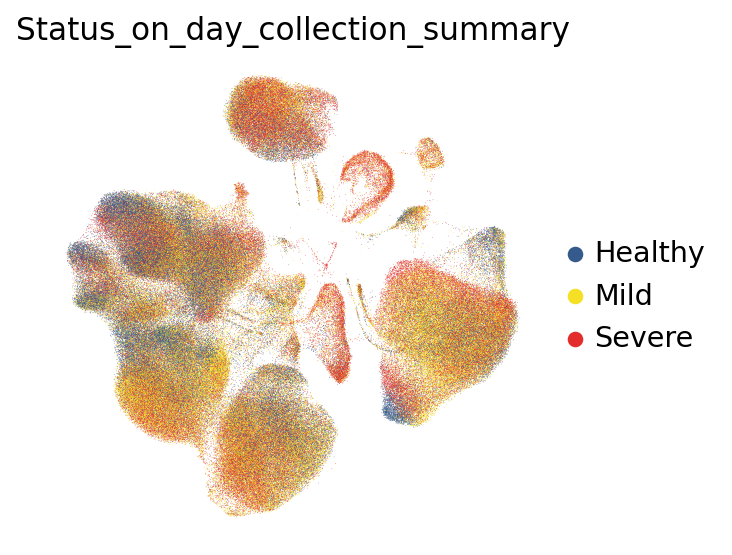

In [5]:
sc.pl.umap(
    adata,
    color=['Status_on_day_collection_summary'],
    ncols=1,
    frameon=False,
    palette = ['#355b8c', '#F5E026', '#E32D2D'],
)

[<Axes: title={'center': 'Status_on_day_collection_summary'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'initial_clustering'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'cell_attn'}, xlabel='UMAP1', ylabel='UMAP2'>]

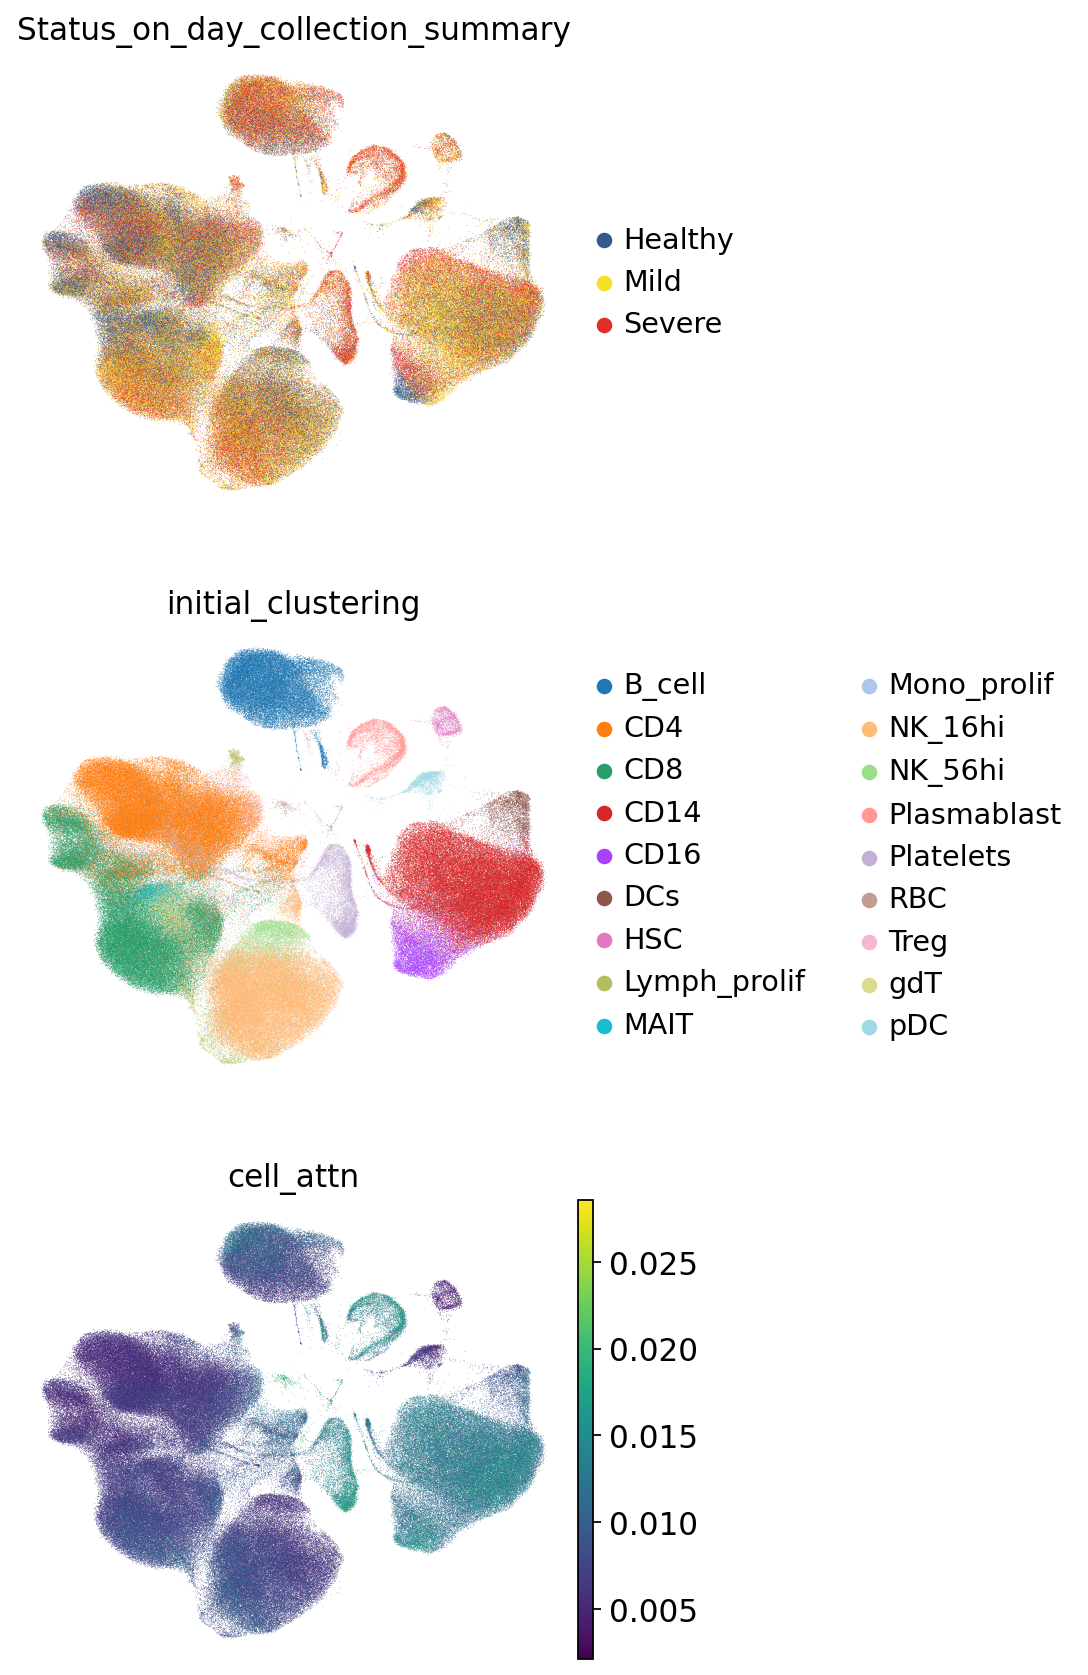

In [6]:
sc.pl.umap(
    adata,
    color=['Status_on_day_collection_summary', 'initial_clustering', 'cell_attn'],
    ncols=1,
    frameon=False,
    show=False,
)

-------- Healthy -------


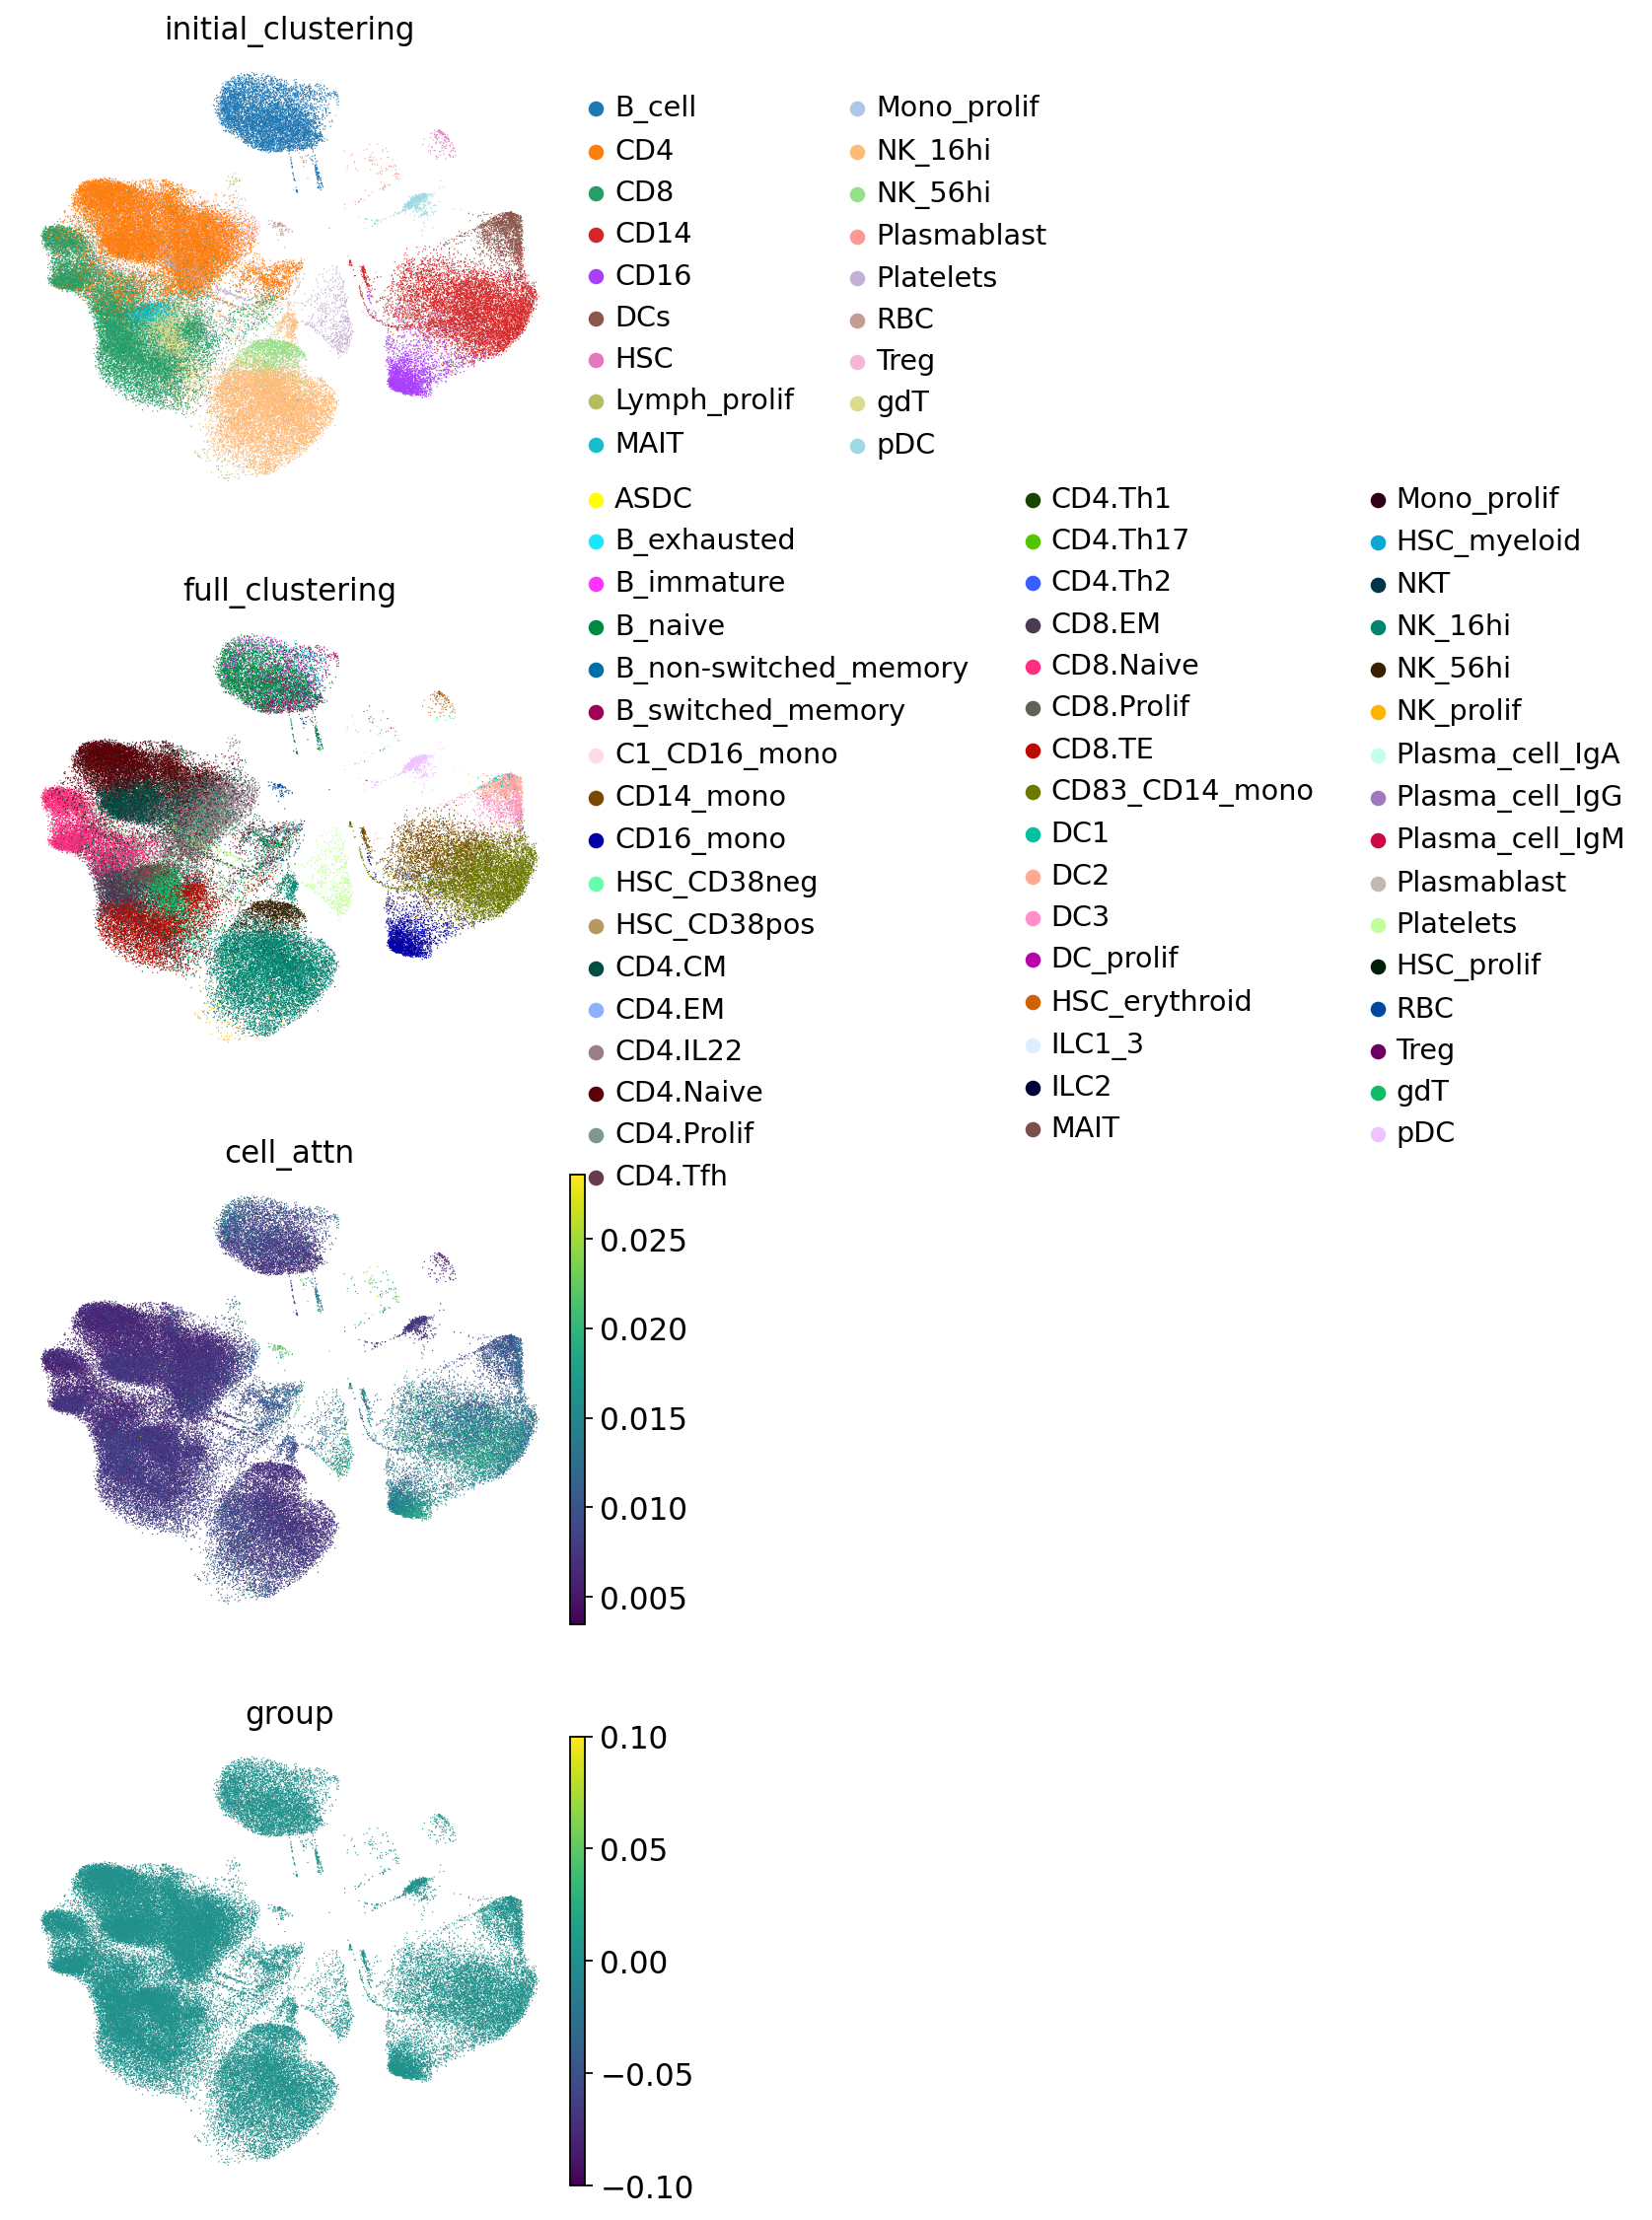

-------- Mild -------


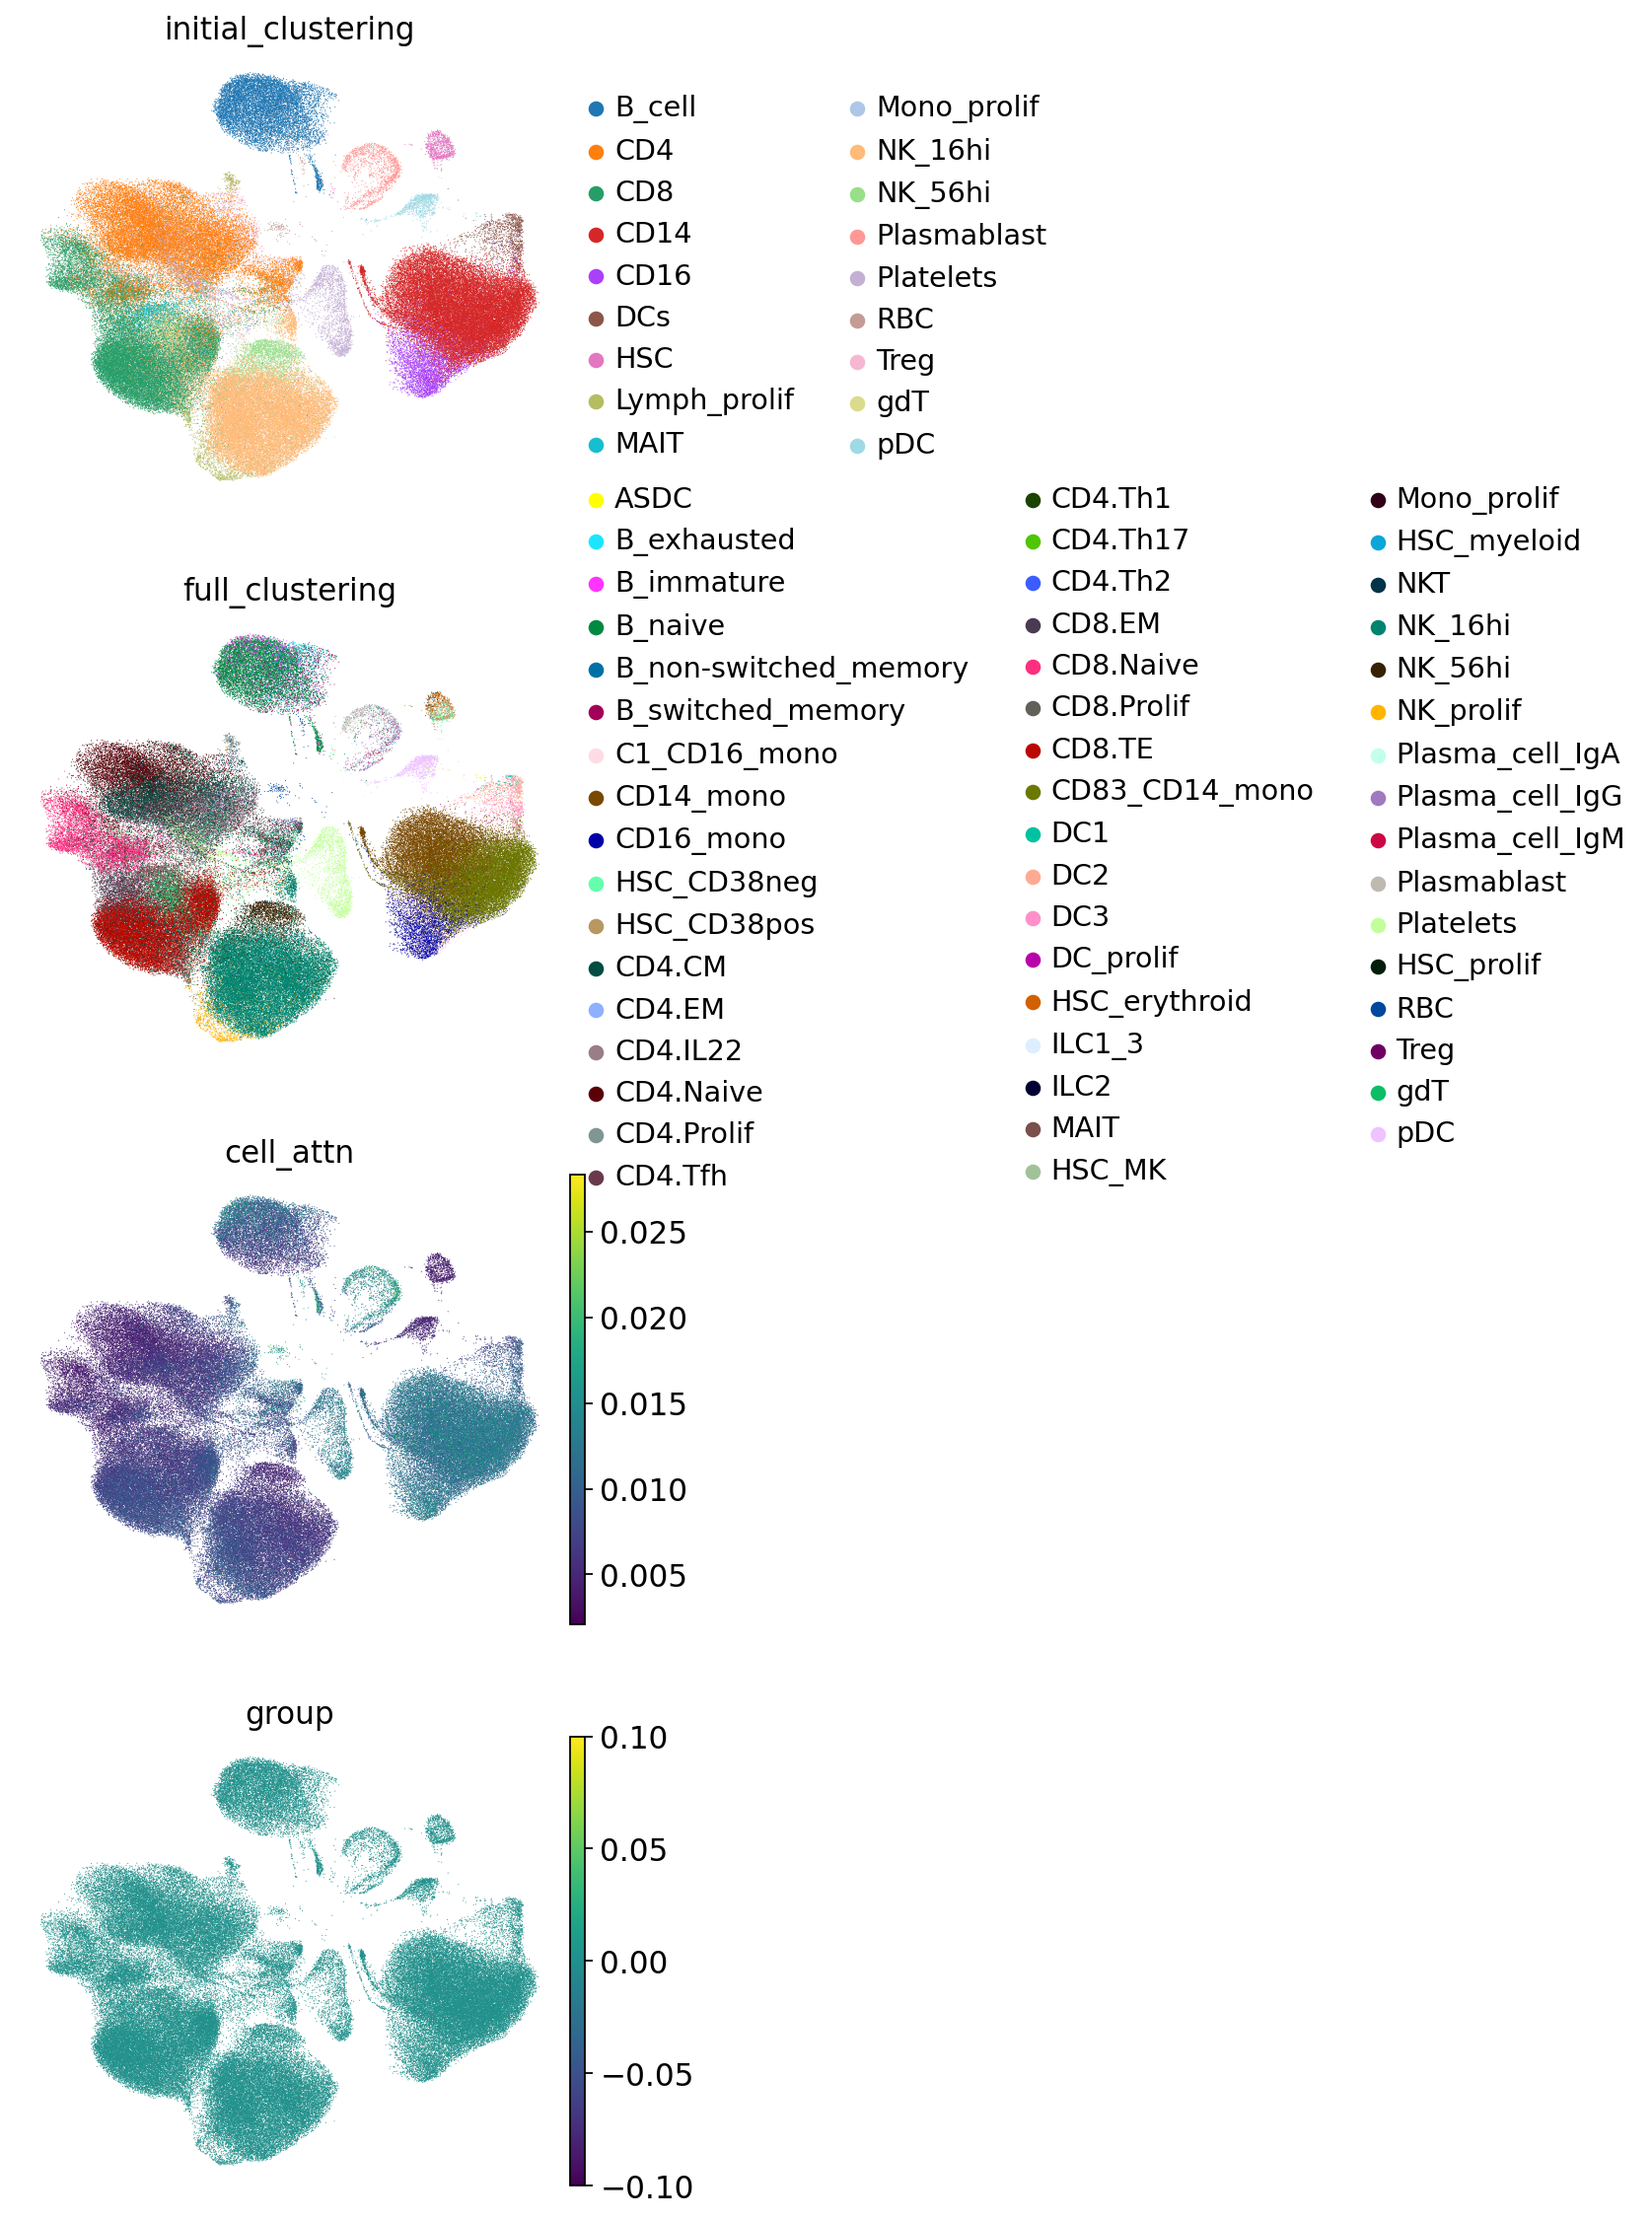

-------- Severe -------


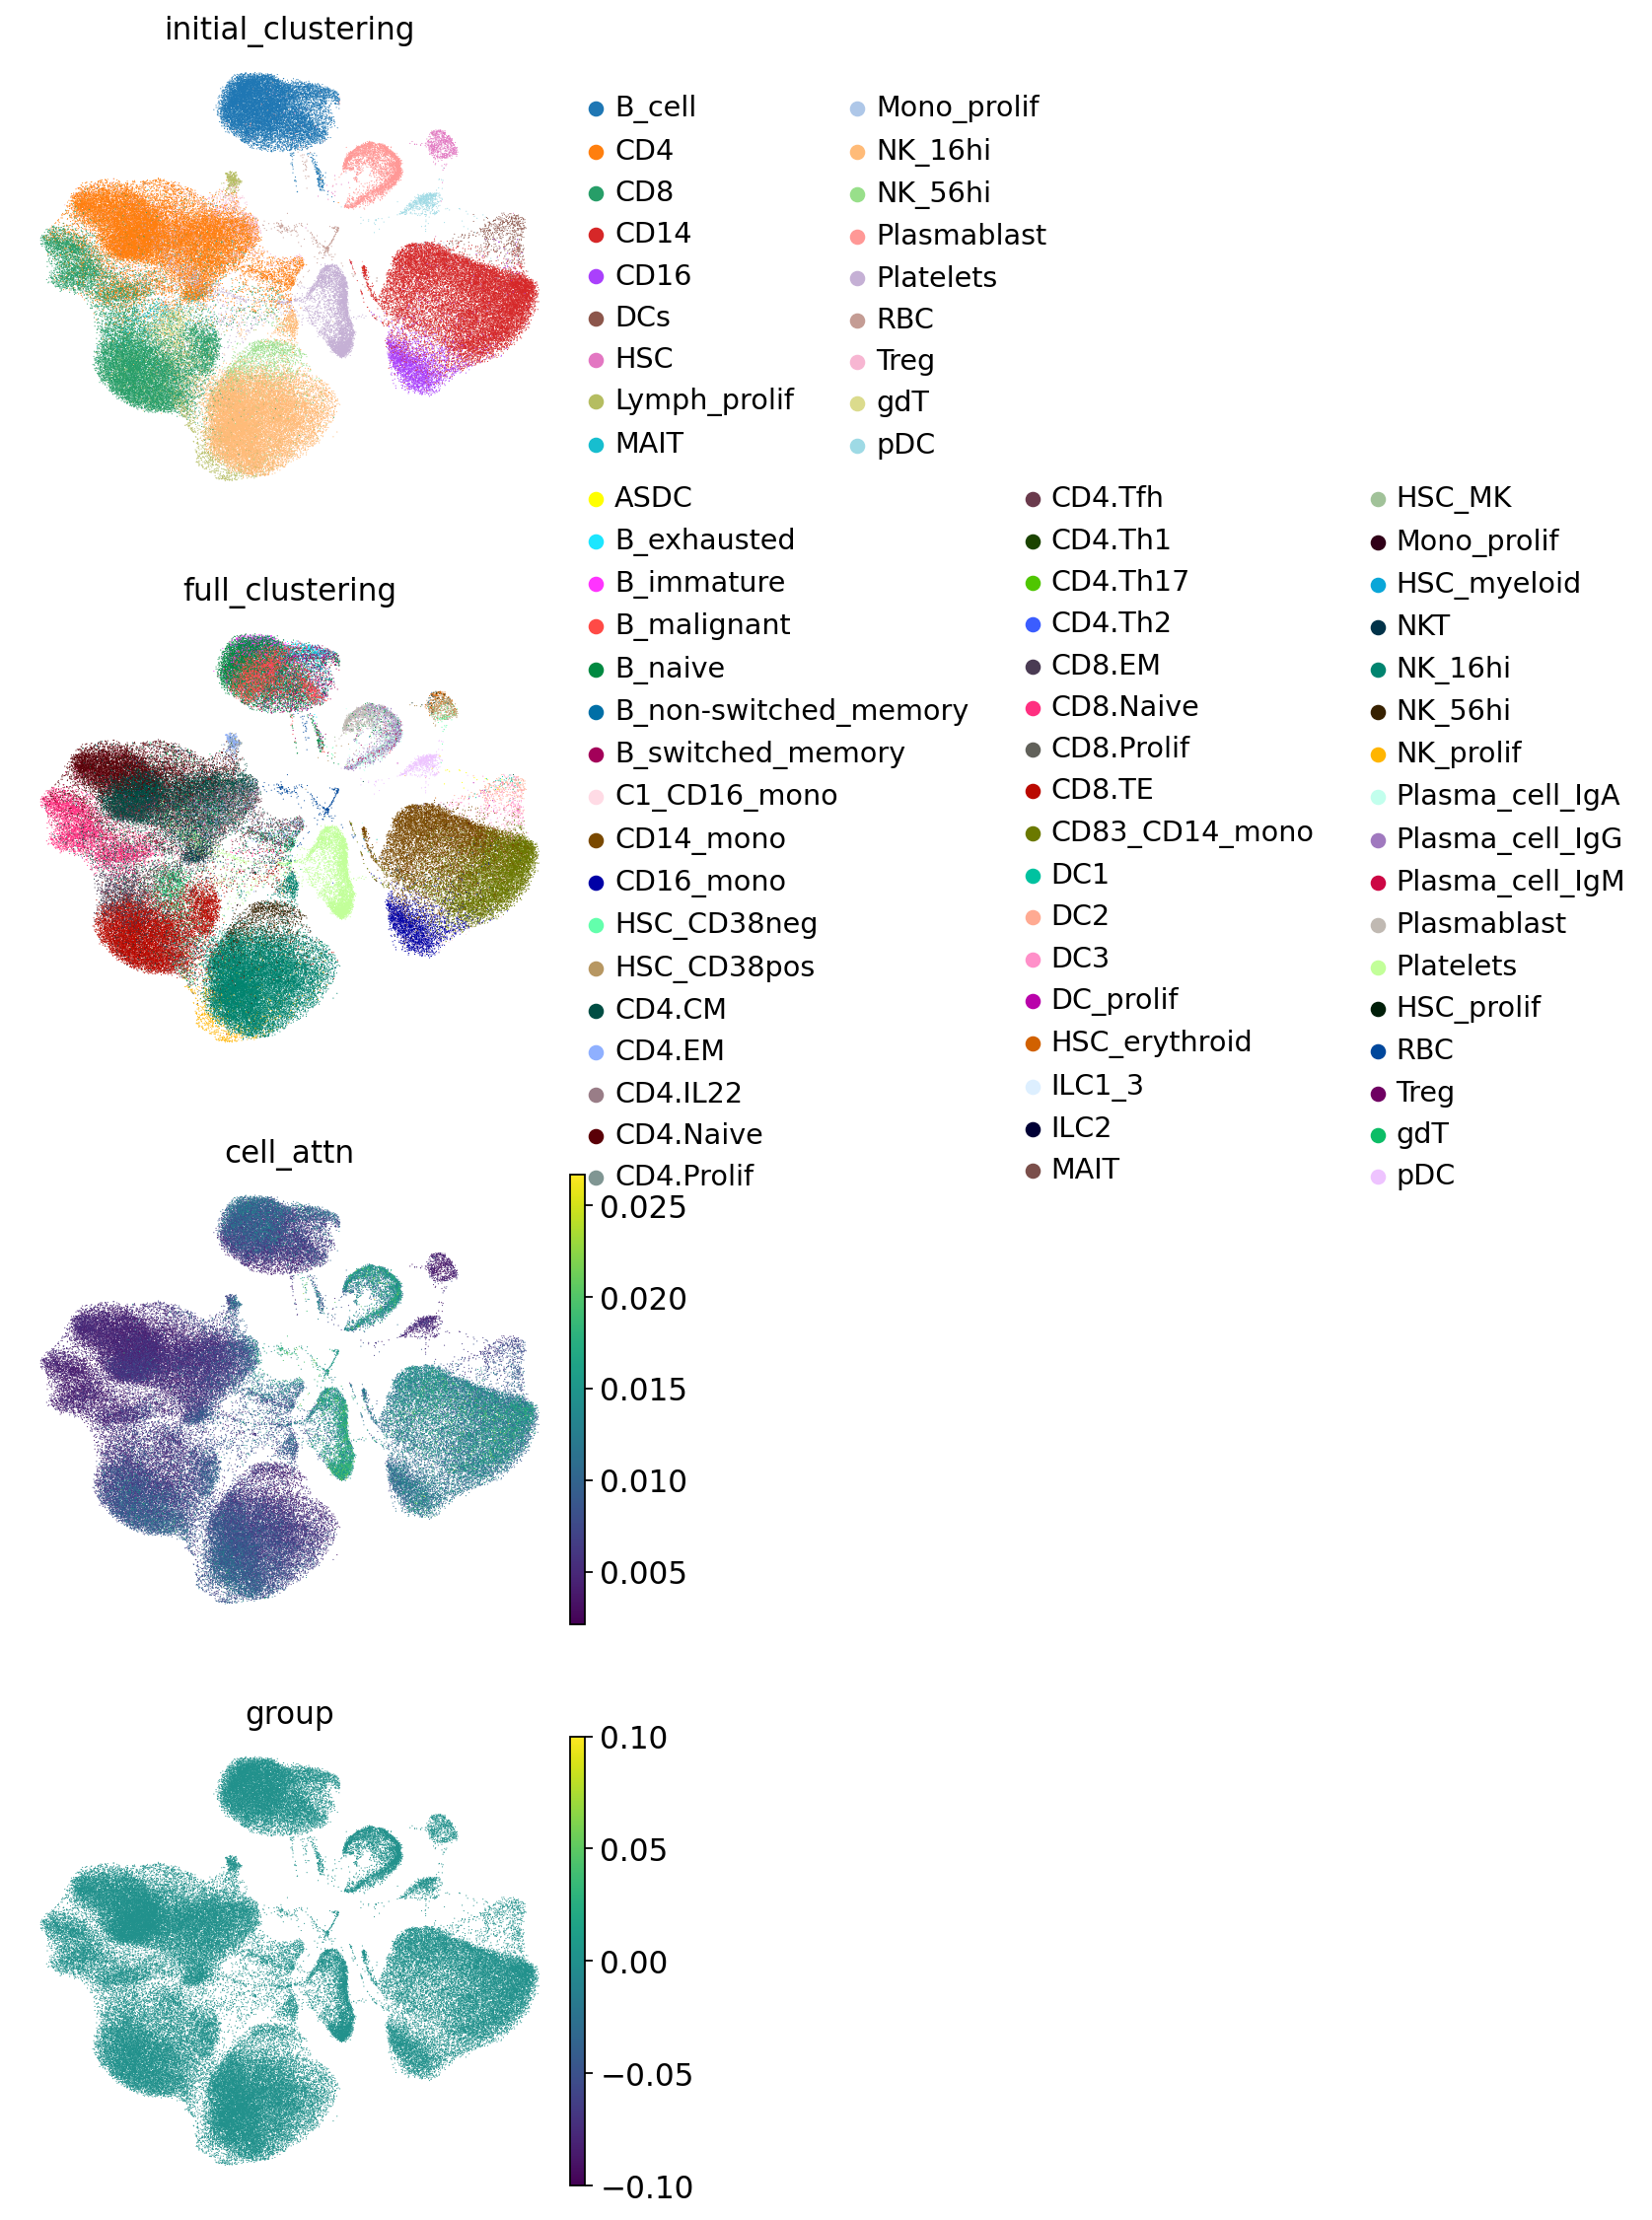

In [7]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    adata_tmp = adata[adata.obs['Status_on_day_collection_summary'] == cond].copy()
    print(f'-------- {cond} -------')
    sc.pl.umap(
        adata_tmp,
        color=['initial_clustering', 'full_clustering', 'cell_attn', 'group'],
        ncols=1,
        frameon=False
    )

In [8]:
dfs = []
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    adata_tmp = adata[adata.obs['Status_on_day_collection_summary'] == cond].copy()
    threshold_idx = int(len(adata_tmp) * 0.9)
    threshold_value = sorted(adata_tmp.obs['cell_attn'])[threshold_idx]
    adata_tmp.obs['group'] = 'all cells'
    adata_tmp.obs.loc[adata_tmp.obs['cell_attn'] >= threshold_value, 'group'] = 'top 10% cells'
    adata.obs[f'top_cells_{cond}'] = False
    adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}'] = True
    adata.obs[f'top_cells_{cond}'] = adata.obs[f'top_cells_{cond}'].astype('category')
    dfs.append(adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs[['initial_clustering', 'Status_on_day_collection_summary']])

In [9]:
adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, 'top_cells_Severe']

covid_index
AAAGATGCAAGGTTTC-MH9143320    True
AAAGATGGTACAGCAG-MH9143320    True
AAAGATGGTTCCATGA-MH9143320    True
AAAGATGTCAAAGACA-MH9143320    True
AAAGATGTCAACACTG-MH9143320    True
                              ... 
BGCV15_GTGGGTCGTGAGTGAC-1     True
BGCV15_GTTCTCGGTACCCAAT-1     True
BGCV15_TGCGGGTCAGGTGGAT-1     True
BGCV15_TGCTACCCAGTCAGAG-1     True
BGCV15_TGGTTCCTCTGCTGCT-1     True
Name: top_cells_Severe, Length: 12328, dtype: category
Categories (2, bool): [False, True]

In [10]:
np.sum(adata.obs['top_cells_Severe'] == True)

12328

In [11]:
adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}']

covid_index
AAAGATGCAAGGTTTC-MH9143320    True
AAAGATGGTACAGCAG-MH9143320    True
AAAGATGGTTCCATGA-MH9143320    True
AAAGATGTCAAAGACA-MH9143320    True
AAAGATGTCAACACTG-MH9143320    True
                              ... 
BGCV15_GTGGGTCGTGAGTGAC-1     True
BGCV15_GTTCTCGGTACCCAAT-1     True
BGCV15_TGCGGGTCAGGTGGAT-1     True
BGCV15_TGCTACCCAGTCAGAG-1     True
BGCV15_TGGTTCCTCTGCTGCT-1     True
Name: top_cells_Severe, Length: 12328, dtype: category
Categories (2, bool): [False, True]

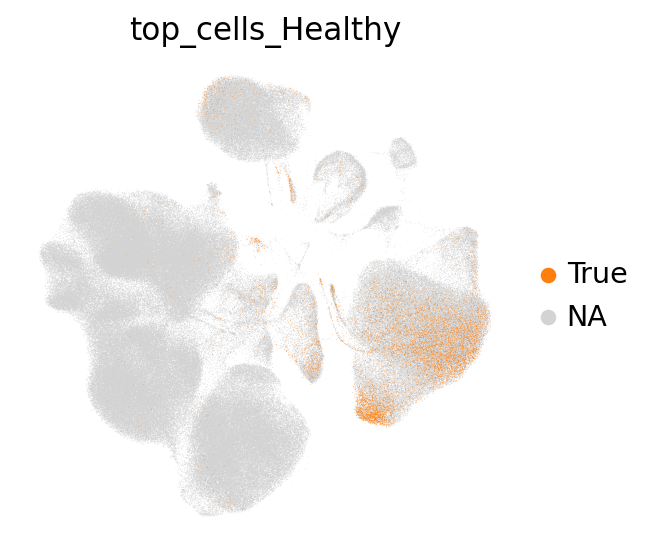

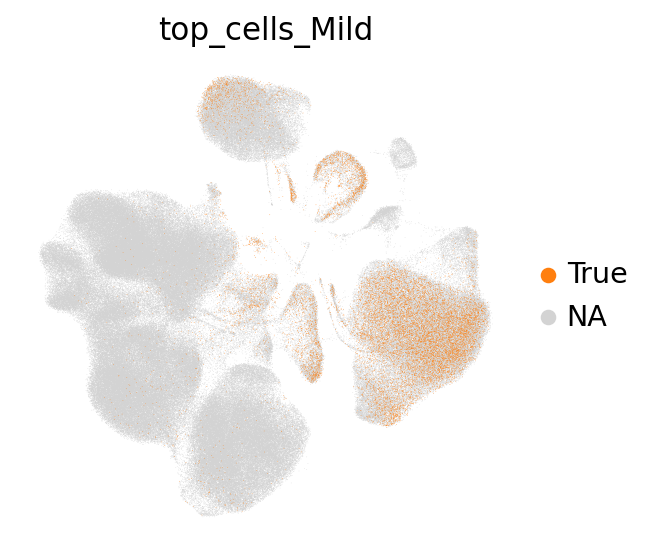

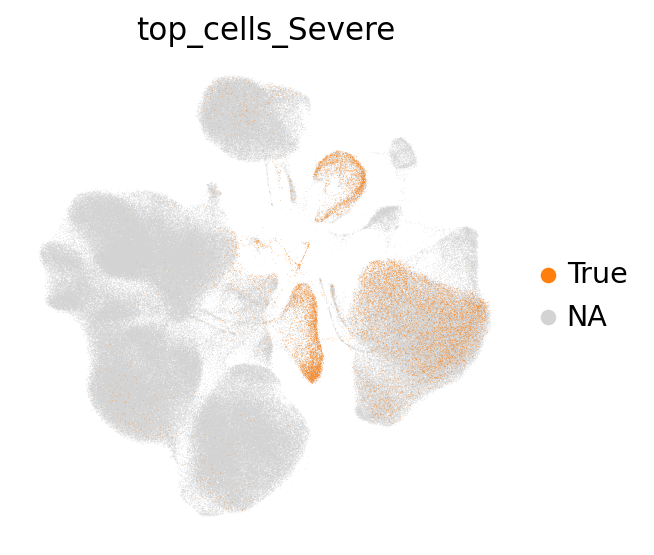

In [12]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    sc.pl.umap(adata, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [13]:
df = pd.concat(dfs)
df

initial_clustering  \
covid_index                                       
AAACGGGAGATAGCAT-newcastle65               CD14   
AAACGGGAGCACAGGT-newcastle65               CD14   
AAACGGGCATAGTAAG-newcastle65               CD14   
AAAGATGCACGCCAGT-newcastle65               CD14   
AAAGATGGTTAAGTAG-newcastle65               CD14   
...                                         ...   
BGCV15_GTGGGTCGTGAGTGAC-1                B_cell   
BGCV15_GTTCTCGGTACCCAAT-1           Plasmablast   
BGCV15_TGCGGGTCAGGTGGAT-1                  CD14   
BGCV15_TGCTACCCAGTCAGAG-1                  CD14   
BGCV15_TGGTTCCTCTGCTGCT-1                  CD14   

                             Status_on_day_collection_summary  
covid_index                                                    
AAACGGGAGATAGCAT-newcastle65                          Healthy  
AAACGGGAGCACAGGT-newcastle65                          Healthy  
AAACGGGCATAGTAAG-newcastle65                          Healthy  
AAAGATGCACGCCAGT-newcastle65                          Healthy  
AAAGATGGTTAAGTAG-newcastle65                          Healthy  
...                                                       ...  
BGCV15_GTGGGTCGTGAGTGAC-1                              Severe  
BGCV15_GTTCTCGGTACCCAAT-1                              Severe  
BGCV15_TGCGGGTCAGGTGGAT-1                              Severe  
BGCV15_TGCTACCCAGTCAGAG-1                              Severe  
BGCV15_TGGTTCCTCTGCTGCT-1                              Severe  

[36245 rows x 2 columns]

In [14]:
df_group = df.groupby('Status_on_day_collection_summary').value_counts(normalize=True).mul(100)
df_group

Status_on_day_collection_summary  initial_clustering
Healthy                           CD14                  58.767065
                                  CD16                  21.832338
                                  Platelets              5.727389
                                  B_cell                 4.084898
                                  RBC                    3.050341
                                  CD4                    1.589164
                                  DCs                    1.386519
                                  NK_16hi                1.023891
                                  Plasmablast            0.991894
                                  Treg                   0.661263
                                  CD8                    0.490614
                                  Lymph_prolif           0.309300
                                  gdT                    0.063993
                                  Mono_prolif            0.010666
                       

In [15]:
df_group = df_group.unstack().reindex(['Healthy', 'Mild', 'Severe'])

In [16]:
df_group

initial_clustering                  B_cell       CD14       CD16       CD4  \
Status_on_day_collection_summary                                             
Healthy                           4.084898  58.767065  21.832338  1.589164   
Mild                              7.365381  60.539165   8.300667  2.427618   
Severe                            2.084685  48.369565   4.218040  1.841337   

initial_clustering                     CD8       DCs       HSC  Lymph_prolif  \
Status_on_day_collection_summary                                               
Healthy                           0.490614  1.386519       NaN      0.309300   
Mild                              0.942164  0.742727  0.027508      0.288838   
Severe                            1.387086  0.089228  0.016223      0.405581   

initial_clustering                    MAIT  Mono_prolif   NK_16hi   NK_56hi  \
Status_on_day_collection_summary                                              
Healthy                                NaN     0.010666  1.023891  0.010666   
Mild                              0.116911     0.110034  0.894024  0.020631   
Severe                            0.024335     0.243348  0.851720  0.016223   

initial_clustering                Plasmablast  Platelets       RBC      Treg  \
Status_on_day_collection_summary                                               
Healthy                              0.991894   5.727389  3.050341  0.661263   
Mild                                 6.911492   6.801458  3.459184  0.777113   
Severe                              13.554510  23.182998  3.114860  0.535367   

initial_clustering                     gdT       pDC  
Status_on_day_collection_summary                      
Healthy                           0.063993       NaN  
Mild                              0.192559  0.082525  
Severe                            0.040558  0.024335

In [17]:
color = []
for ct in df_group.columns:
    idx = list(adata.obs['initial_clustering'].cat.categories).index(ct)
    color.append(adata.uns['initial_clustering_colors'][idx])
len(color)

18

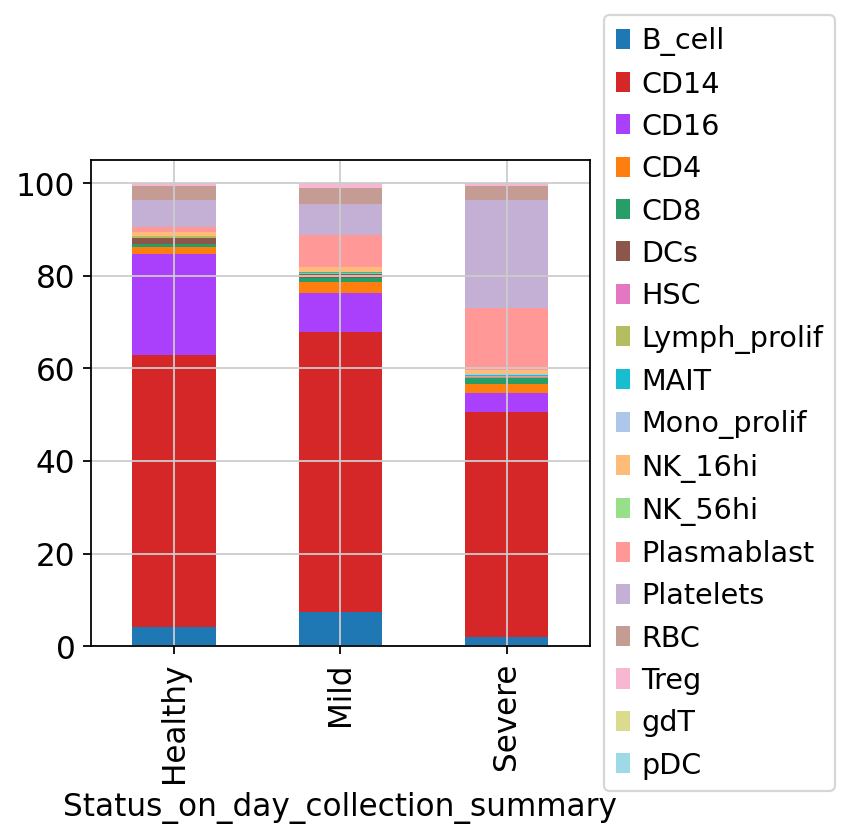

In [18]:
df_group.plot.bar(stacked=True, color=color).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [19]:
mono = adata[adata.obs['initial_clustering'] == 'CD14'].copy()
mono

AnnData object with n_obs × n_vars = 61064 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Healthy', 'top_cells_Mild', 'top_cells_Severe'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap', 'top_cells_Healthy_colors', 'top_cells_Mild_colors', 'top_cells_Severe_colors'
 

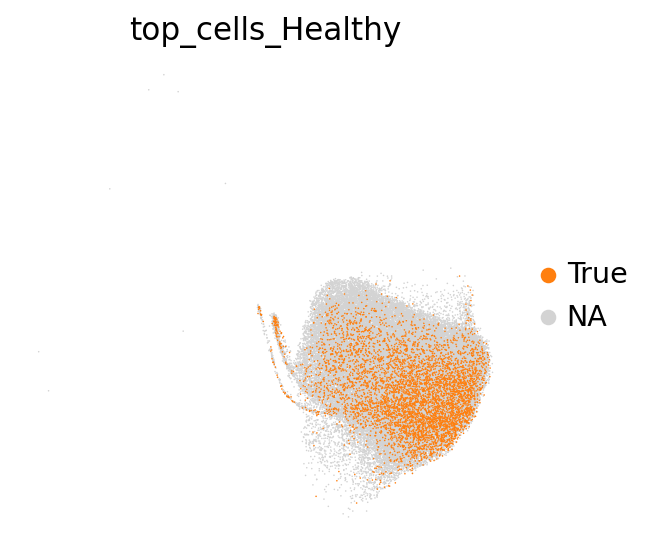

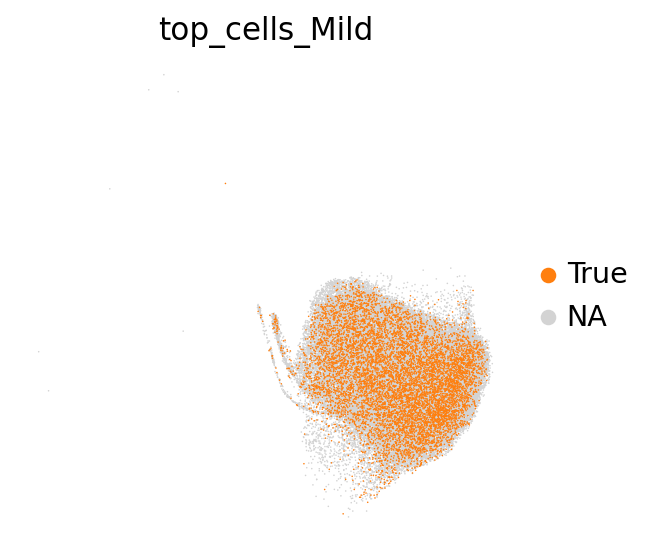

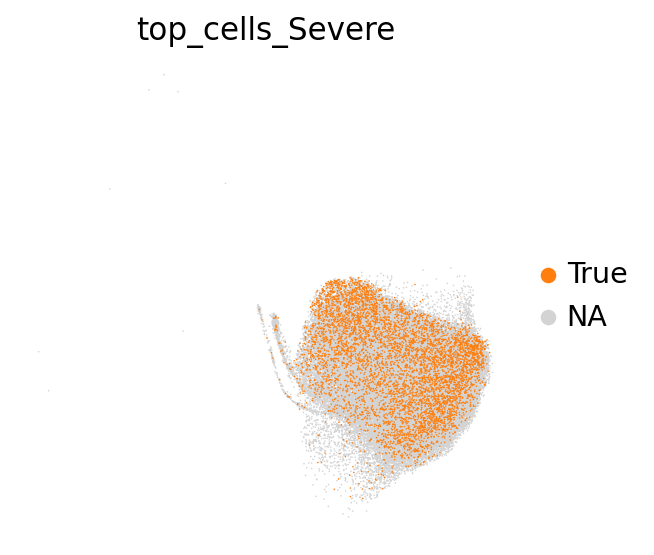

In [20]:
for cond in np.unique(mono.obs['Status_on_day_collection_summary']):
    sc.pl.umap(mono, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [21]:
plat = adata[adata.obs['initial_clustering'] == 'Platelets'].copy()
plat

AnnData object with n_obs × n_vars = 10821 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Healthy', 'top_cells_Mild', 'top_cells_Severe'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap', 'top_cells_Healthy_colors', 'top_cells_Mild_colors', 'top_cells_Severe_colors'
 

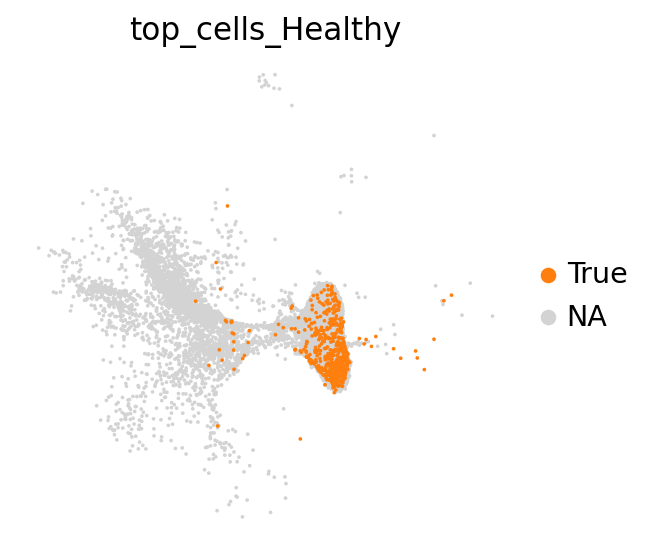

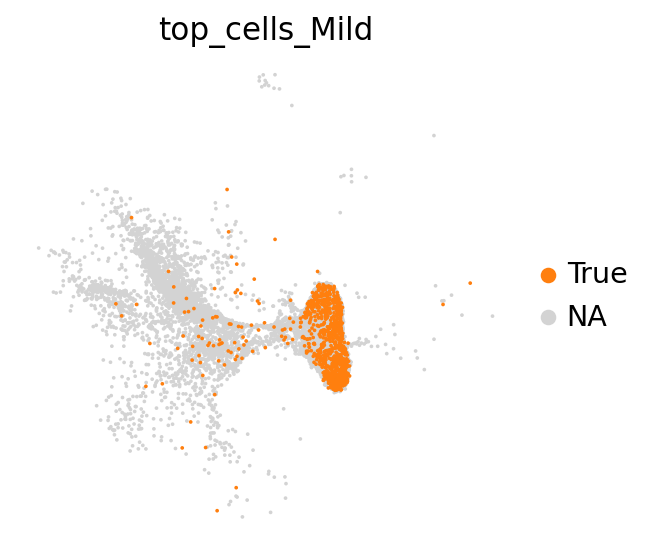

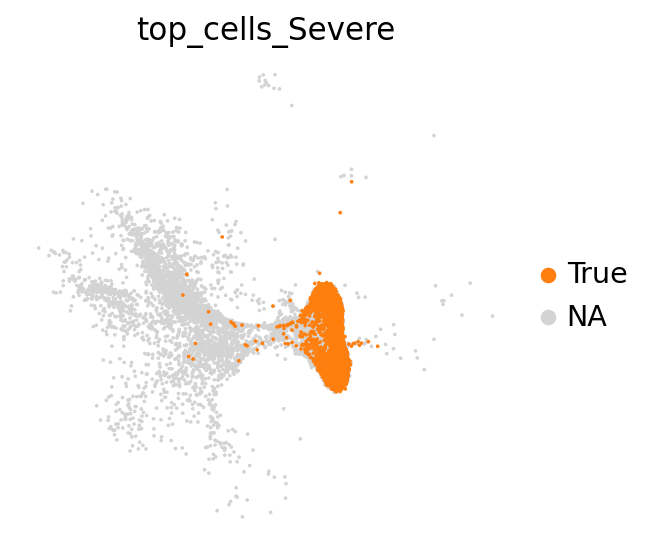

In [22]:
for cond in np.unique(plat.obs['Status_on_day_collection_summary']):
    sc.pl.umap(plat, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [23]:
mono16 = adata[adata.obs['initial_clustering'].isin(['CD16'])].copy()
mono16

AnnData object with n_obs × n_vars = 10849 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Healthy', 'top_cells_Mild', 'top_cells_Severe'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap', 'top_cells_Healthy_colors', 'top_cells_Mild_colors', 'top_cells_Severe_colors'
 

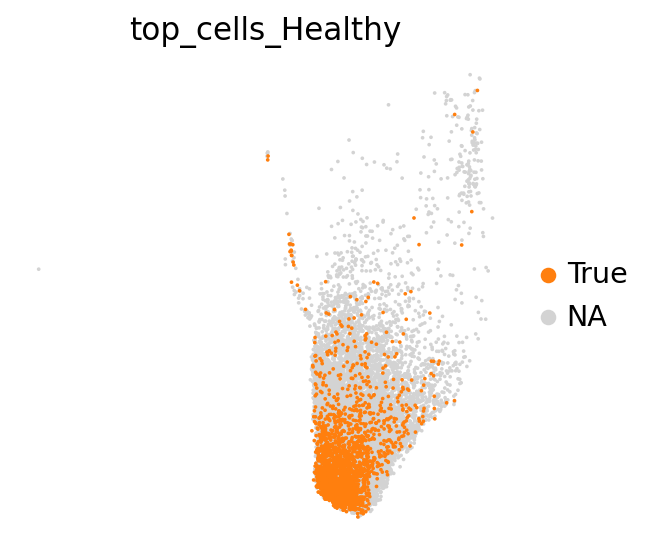

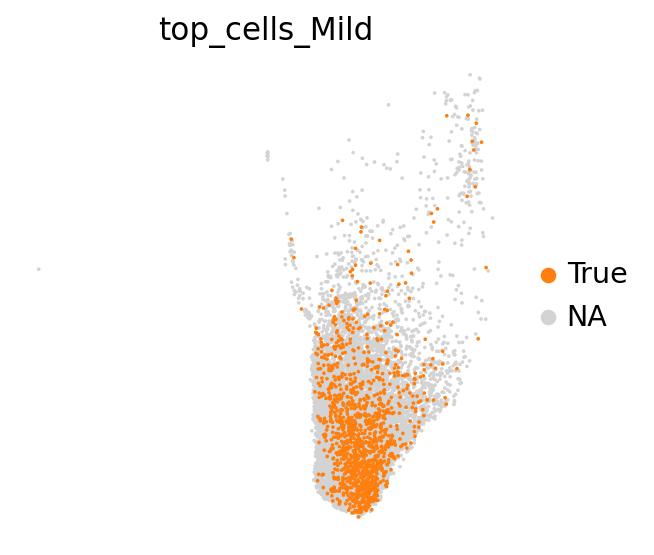

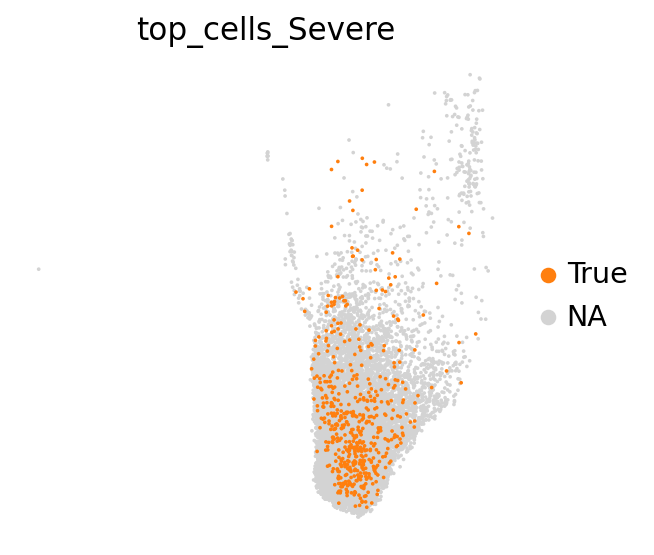

In [24]:
for cond in np.unique(mono16.obs['Status_on_day_collection_summary']):
    sc.pl.umap(mono16, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [27]:
plas = adata[adata.obs['initial_clustering'] == 'Plasmablast'].copy()
plas

AnnData object with n_obs × n_vars = 5145 × 2192
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Healthy', 'top_cells_Mild', 'top_cells_Severe'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap', 'top_cells_Healthy_colors', 'top_cells_Mild_colors', 'top_cells_Severe_colors'
  

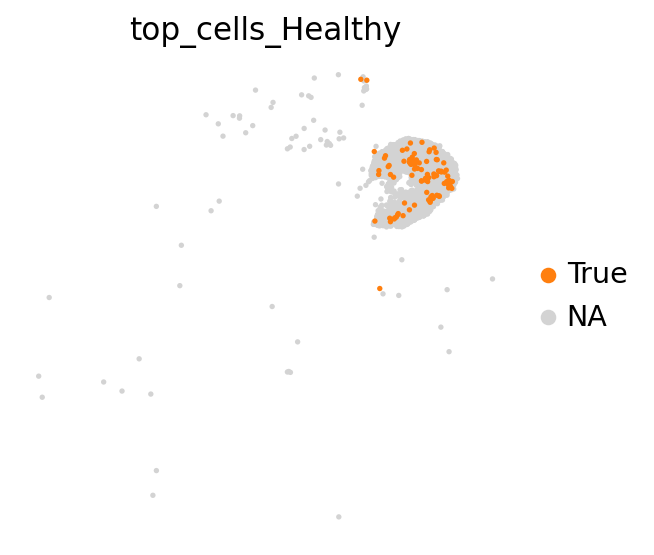

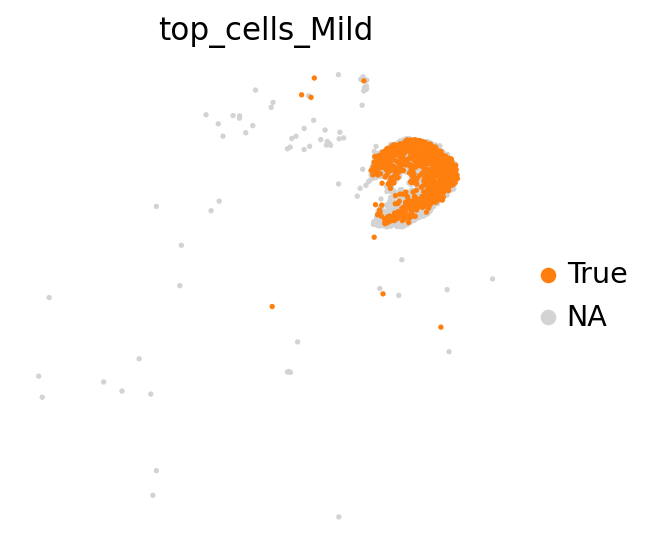

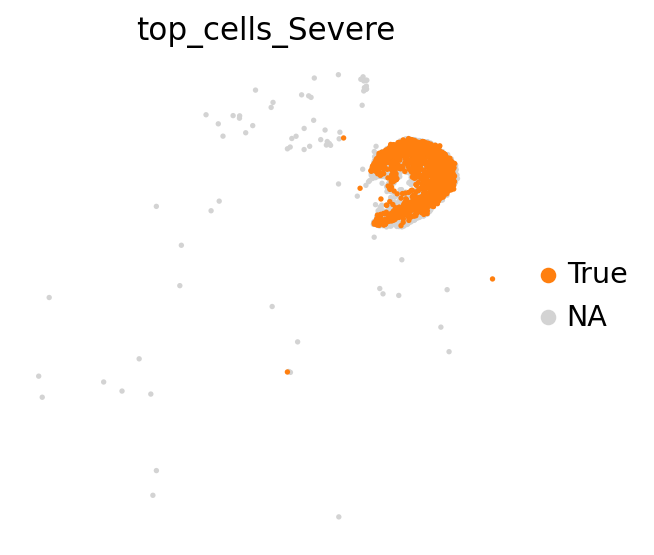

In [28]:
for cond in np.unique(plas.obs['Status_on_day_collection_summary']):
    sc.pl.umap(plas, color=[f'top_cells_{cond}'], groups=[True], frameon=False)